# Introduction
- meta data(train dataと内の分子についての情報)の解析
- ref: 
    > using-meta-features-to-improve-model

# Import everything I nead :)

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# Preparation

In [8]:
isSmallSet = True
step = 1000

In [9]:
file_path = './input/champs-scalar-coupling/'
glob.glob(file_path + '*')

['./input/champs-scalar-coupling/magnetic_shielding_tensors.csv',
 './input/champs-scalar-coupling/structures.csv',
 './input/champs-scalar-coupling/mulliken_charges.csv',
 './input/champs-scalar-coupling/scalar_coupling_contributions.csv',
 './input/champs-scalar-coupling/train.csv',
 './input/champs-scalar-coupling/structures',
 './input/champs-scalar-coupling/test.csv',
 './input/champs-scalar-coupling/sample_submission.csv',
 './input/champs-scalar-coupling/dipole_moments.csv',
 './input/champs-scalar-coupling/potential_energy.csv']

In [10]:
# scaler_coupling_contributions.csv
path = file_path + 'scalar_coupling_contributions.csv'
if isSmall:
    contrib = pd.read_csv(path)[::step]
else:
    contrib = pd.read_csv(path)

In [11]:
# train
path = file_path + 'train.csv'
if isSmallSet:
    train = pd.read_csv(path)[::step]
else:
    train = pd.read_csv(path)

In [12]:
# scalar coupling contributions
path = file_path + 'scalar_coupling_contributions.csv'
if isSmallSet:
    contrib = pd.read_csv(path)[::step]
else:
    contrib = pd.read_csv(path)

In [13]:
# set
sns.set(style='darkgrid')

# Exploratory Data Analysis

array([84.807609, 11.047635,  5.263487, ..., -9.702087, -0.74231 ,
        2.413229])

In [26]:
contrib['contrib_sum'] =  contrib[['fc', 'sd', 'pso', 'dso']].sum(axis=1).values
contrib['scalar_coupling_constant'] = train['scalar_coupling_constant']
contrib.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,contrib_sum,scalar_coupling_constant
0,dsgdb9nsd_000001,1,0,1JHC,83.02240,0.254579,1.258620,0.272010,84.807609,84.80760
1000,dsgdb9nsd_000067,7,8,3JHH,11.81870,0.041325,2.033530,-2.845920,11.047635,11.04760
2000,dsgdb9nsd_000115,8,2,3JHC,5.70336,0.083219,-0.013703,-0.509389,5.263487,5.26349
3000,dsgdb9nsd_000155,10,1,3JHC,2.41287,-0.032054,-0.046561,0.072151,2.406406,2.40641
4000,dsgdb9nsd_000227,7,4,3JHC,2.46088,-0.034680,-0.107725,0.111061,2.429536,2.42954


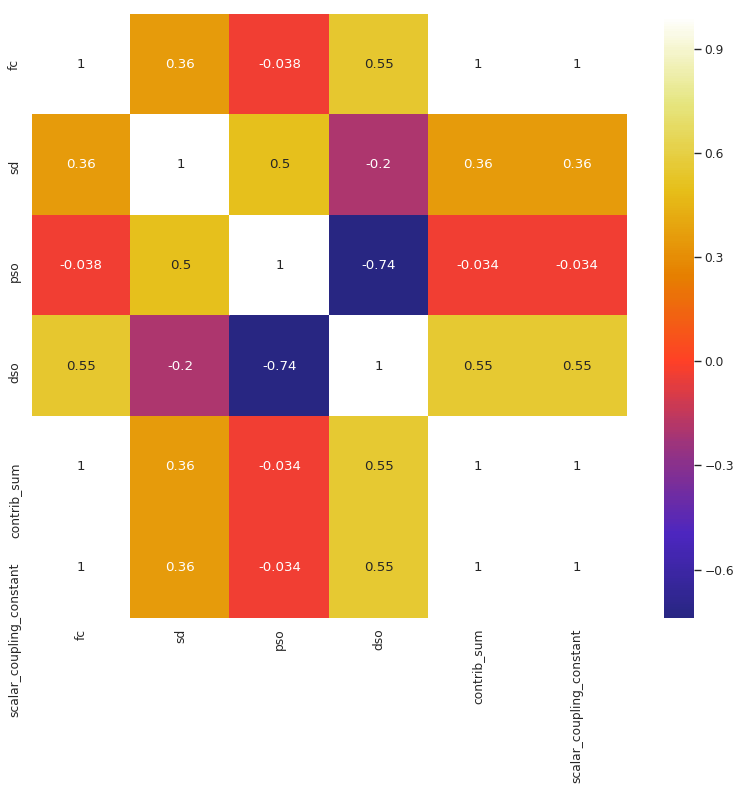

In [27]:
df = contrib.drop(['molecule_name', 'atom_index_0', 'atom_index_1', 'type'], axis=1).copy()
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='CMRmap', center=0, annot=True)

---->`scalar coupling constant`に対して、 `fc`, `dso`に高い相関

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 800x640 with 0 Axes>

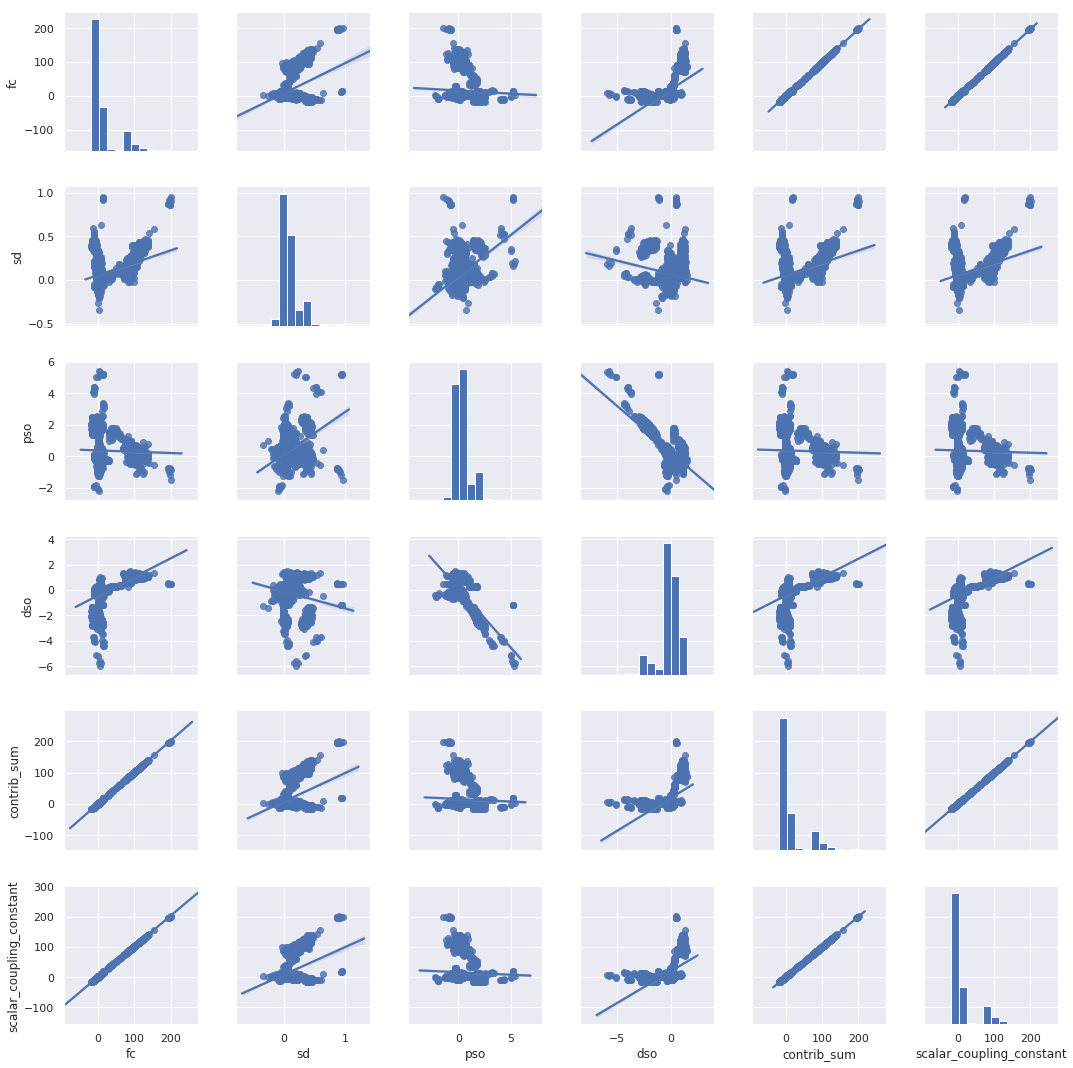

In [28]:
df = contrib.drop(['molecule_name', 'atom_index_0', 'atom_index_1', 'type'], axis=1).copy()
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg")